In [1]:
import numpy as np
import pandas as pd

In [2]:
file = ''


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if '.csv' in filename:
            print(os.path.join(dirname, filename))
            file = os.path.join(dirname, filename)
            break

In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.metrics import AUC, F1Score, Precision, Recall, BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [7]:
df = pd.read_csv('DATASET-balanced.csv')

In [8]:
df['LABEL'] = df['LABEL'].map({'FAKE': 1, 'REAL': 0})

In [9]:
print(True in df.isna())
print(True in df.isnull())

False
False


In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,LABEL
0,0.434420,0.010428,3654.215839,3476.884276,6029.296875,0.123343,-485.487274,122.040565,-5.436024,33.132732,...,-8.445394,-2.936203,0.365490,-8.423420,6.770203,-2.236708,1.512651,2.412600,-4.973174,1
1,0.362887,0.025587,2342.893606,2935.652973,4107.116205,0.053389,-375.190399,157.900528,-6.320182,38.309902,...,-12.795143,-4.172510,-3.173376,-5.565846,-8.102596,-2.640123,-5.720956,-1.075956,-12.127365,0
2,0.429961,0.023098,4769.625648,3988.267624,9144.889981,0.145511,-356.662842,78.522896,-38.929577,42.164318,...,-3.112957,-7.801226,-11.172655,-6.737967,-13.176278,-8.453712,-13.410210,-6.572034,-14.356358,0
3,0.200353,0.117831,1490.480382,2020.803564,2262.390525,0.033645,-271.098999,162.267334,-33.003162,-0.611585,...,-8.085480,-6.355404,-6.591592,-1.410072,-3.146891,-8.363245,-3.604724,-5.088068,-16.382357,1
4,0.491303,0.041751,3041.065280,3638.781766,6106.467892,0.072294,-350.455689,135.754456,-13.105219,20.527149,...,8.304556,-8.588508,-0.572785,-6.155067,2.703197,-1.599514,2.103551,-2.299909,0.920473,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.441565,0.080364,1162.973349,1466.225141,2018.395502,0.037485,-297.245667,191.568298,0.334149,-5.123982,...,-6.465257,-0.120986,6.203625,1.263023,0.382126,0.066055,-5.016092,-1.600655,2.141849,0
11774,0.318175,0.051559,2024.412957,2441.937222,3385.222739,0.045924,-328.978943,164.048523,-39.911701,6.005329,...,-14.987345,-2.074536,-6.526327,-8.372523,-4.753191,-6.680845,-5.108403,0.102955,-0.061355,0
11775,0.443750,0.034111,2172.557865,2839.923273,4175.076488,0.042768,-363.679504,152.001968,-25.896812,52.234081,...,-1.154219,1.270845,3.009017,-1.650969,2.663095,0.118458,3.048476,0.163568,0.822175,1
11776,0.385435,0.041060,2416.685728,2685.926348,3980.260971,0.061095,-349.334228,149.331924,-45.167198,6.208394,...,-16.098841,-4.360042,-9.381591,-10.041245,-5.338403,-10.489751,-6.709141,-3.380858,-4.899646,0


In [12]:
X = df.drop(columns=['LABEL'])  # Features
y = df['LABEL'].to_numpy()  # Target variable
X = X.to_numpy()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

print(X_train)
print(y_train)

print(len(X_train))
print(len(y_train))

[[ 5.30346000e-01  2.86310000e-02  2.79266444e+03 ...  4.60648200e+00
   3.48245000e-01  3.83841400e+00]
 [ 4.47549000e-01  3.68630000e-02  2.94920482e+03 ... -4.61664700e+00
   1.65326200e+00 -4.13195000e-01]
 [ 4.26855000e-01  5.02130000e-02  2.87868118e+03 ... -2.90104800e+00
  -1.08818700e+01 -8.52240600e+00]
 ...
 [ 4.07128000e-01  4.29120000e-02  1.37151133e+03 ... -4.17779800e+00
  -9.67454300e+00 -7.57713400e+00]
 [ 4.39837000e-01  1.11340000e-02  3.88232921e+03 ... -2.75005100e+00
  -1.45273500e+00 -2.55489300e+00]
 [ 3.63642000e-01  3.14020000e-02  1.96647427e+03 ... -4.17455600e+00
  -2.77622200e+00 -9.07196700e+00]]
[1 1 0 ... 1 1 0]
9422
9422


In [13]:
scaler = MinMaxScaler()

# Fit the scaler to the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [14]:
scaler = StandardScaler()

# Fit the scaler to the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
X_train, len(X_train[0]), X_train.shape

(array([[ 1.55959107, -0.33477666,  0.07285842, ...,  1.559074  ,
          0.61722463,  1.5021645 ],
        [ 0.36693334, -0.04288313,  0.21827033, ..., -0.30382594,
          0.87959381,  0.72617115],
        [ 0.06884453,  0.43048647,  0.15276022, ...,  0.04269304,
         -1.64055141, -0.75390235],
        ...,
        [-0.21531503,  0.17160471, -1.24726477, ..., -0.21518663,
         -1.39782246, -0.5813736 ],
        [ 0.25584506, -0.95519224,  1.08505881, ...,  0.07319162,
          0.25514379,  0.33527364],
        [-0.8417135 , -0.23652144, -0.69459781, ..., -0.21453181,
         -0.01093873, -0.85420688]]),
 26,
 (9422, 26))

In [20]:
pca = PCA(10)
# Fit the PCA object to the data
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)# Initialize a PCA object
pca = PCA(10)

# Fit the PCA object to the data
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.fit_transform(X_test)

In [21]:
pca_X_train, len(pca_X_train[0]), pca_X_train.shape

(array([[-0.88427895,  2.97932673, -1.53821127, ...,  1.15787512,
         -1.49785069,  0.23579905],
        [ 0.0133775 ,  0.78639565, -0.50261724, ...,  0.30414719,
          0.10928298, -0.10489514],
        [ 1.74117771, -2.78596446,  0.49066597, ..., -0.74854633,
          1.33621977, -0.16517216],
        ...,
        [-1.51497371, -0.98051403, -0.65684093, ...,  0.00318721,
          0.55068431, -1.0831786 ],
        [ 1.10301396,  3.17015944,  0.21851002, ...,  0.43991916,
          0.09966173,  0.88776018],
        [-1.26632827, -0.99301816,  1.62926336, ...,  0.57848496,
         -0.43810687,  0.47280827]]),
 10,
 (9422, 10))

In [22]:
MAX_DEPTH = 7

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=MAX_DEPTH)

# Train the model
clf.fit(pca_X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(pca_X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}\nF1: {f1:.4f}\nAUC: {auc:.4f}\nPrecision: {precision:.4f}\nRecall:{recall:.4f}')

Accuracy: 0.8154
F1: 0.8230
AUC: 0.8155
Precision: 0.7886
Recall:0.8604


In [23]:
val_data_len = len(X_train)//5

val_nn_X_data = X_train[:val_data_len,:]
val_nn_y_data = y_train[:val_data_len]
nn_X_train = X_train[val_data_len:,:]
nn_y_train = y_train[val_data_len:]

print(len(val_nn_X_data))
print(len(val_nn_y_data))
print(len(nn_X_train))
print(len(nn_y_train))

1884
1884
7538
7538


In [31]:
INPUT_DIM = 26
BATCH_SIZE = 100
N_O_EPOCHS = 50
LR = 0.0001
DROPOUT_R = 0.15
# Create a Sequential model
model = Sequential()
model.add(Input((INPUT_DIM,), batch_size=BATCH_SIZE))
# Add an input layer and a hidden layer with 16 neurons
model.add(Dense(16, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 32 neurons
model.add(Dense(32, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 64 neurons
model.add(Dense(64, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 128 neurons
model.add(Dense(128, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 256 neurons
model.add(Dense(256, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 512 neurons
model.add(Dense(512, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 1024 neurons
model.add(Dense(1024, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an input layer and a hidden layer with 2048 neurons
model.add(Dense(2048, activation='gelu'))
model.add(Dropout(DROPOUT_R))
# Add an output layer with 1 neuron (binary classification)
model.add(Dense(1, activation='sigmoid'))
# Callbacks
es = EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.000001)
callbacks = [es, reduce_lr]

In [32]:
from tensorflow.keras.metrics import AUC, Precision, Recall, BinaryAccuracy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

# Assuming LR, N_O_EPOCHS, BATCH_SIZE, nn_X_train, nn_y_train, val_nn_X_data, val_nn_y_data, and callbacks are defined elsewhere

model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=LR),
              metrics=[AUC(), Precision(), Recall(), BinaryAccuracy()])


In [33]:
history = model.fit(nn_X_train, nn_y_train,
          epochs=N_O_EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data=[val_nn_X_data, val_nn_y_data],
          callbacks=callbacks,
          verbose=1)

Epoch 1/50
76/76 [==============================] - 12s 104ms/step - loss: 0.6260 - auc_1: 0.7284 - precision_1: 0.6657 - recall_1: 0.7053 - binary_accuracy: 0.6734 - val_loss: 0.4781 - val_auc_1: 0.8700 - val_precision_1: 0.7677 - val_recall_1: 0.8152 - val_binary_accuracy: 0.7893 - lr: 1.0000e-04
Epoch 2/50
76/76 [==============================] - 8s 111ms/step - loss: 0.5141 - auc_1: 0.8251 - precision_1: 0.7387 - recall_1: 0.7720 - binary_accuracy: 0.7478 - val_loss: 0.4178 - val_auc_1: 0.9109 - val_precision_1: 0.7904 - val_recall_1: 0.8609 - val_binary_accuracy: 0.8206 - lr: 1.0000e-04
Epoch 3/50
76/76 [==============================] - 7s 89ms/step - loss: 0.4614 - auc_1: 0.8655 - precision_1: 0.7721 - recall_1: 0.8089 - binary_accuracy: 0.7836 - val_loss: 0.3688 - val_auc_1: 0.9302 - val_precision_1: 0.7921 - val_recall_1: 0.9152 - val_binary_accuracy: 0.8413 - lr: 1.0000e-04
Epoch 4/50
76/76 [==============================] - 8s 108ms/step - loss: 0.4323 - auc_1: 0.8800 - prec

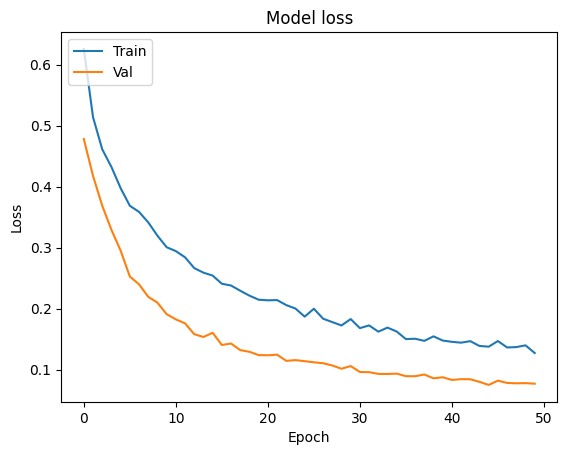

In [42]:
import matplotlib.pyplot as plt

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [43]:
results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

24/24 [==============================] - 1s 28ms/step - loss: 0.0737 - auc_1: 0.9964 - precision_1: 0.9646 - recall_1: 0.9753 - binary_accuracy: 0.9699


In [44]:
from sklearn.neighbors import KNeighborsClassifier

NO_NEIGHBORS = 10

knn = KNeighborsClassifier(n_neighbors=NO_NEIGHBORS)
knn.fit(pca_X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(pca_X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}\nF1: {f1:.4f}\nAUC: {auc:.4f}\nPrecision: {precision:.4f}\nRecall:{recall:.4f}')

Accuracy: 0.8557
F1: 0.8620
AUC: 0.8558
Precision: 0.8239
Recall:0.9038


In [45]:
y_pred_dt = clf.predict(pca_X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt, normalize='pred')
print(cm_dt)

[[0.84729981 0.21138846]
 [0.15270019 0.78861154]]


<Axes: >

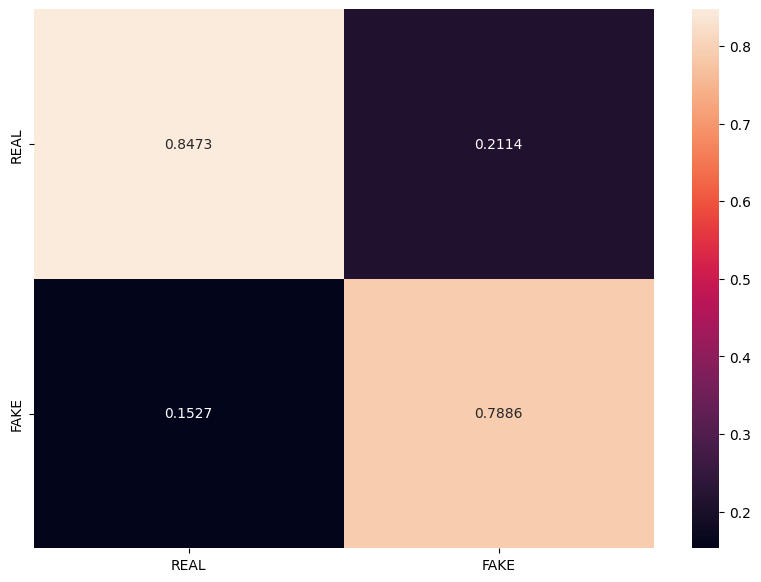

In [46]:
import seaborn as sn

df_cm = pd.DataFrame(cm_dt, index = [i for i in ["REAL","FAKE"]],
                  columns = [i for i in ["REAL","FAKE"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.4f')